In [2]:
import os
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 拿到所有dump数据名
path = 'D:\codes\edge_matching\data'
file_names = os.listdir(path)
print(file_names)

# 按方向将dump数据分类
directions = ['front_down', 'front_up', 'rear_down', 'rear_up', 'left', 'right']
files_dic = {}
for direction in directions:
    files_dic[direction] = {'rectify': [], 'disparity': []}
for file in file_names:
    for direction in directions:
        if re.search(direction, file) is not None:
            if re.search('disparity', file): files_dic[direction]['disparity'].append(file)
            else: files_dic[direction]['rectify'].append(file)
            #files_dic.setdefault(direction, []).append(file)
print(files_dic)

['disp0.pfm', 'im0.png', 'im1.png', 'tree.jpg']


In [8]:
def error_analysis(files_dic, direction):
    all_map_bad_1 = np.zeros_like((240, 320))
    all_map_bad_2 = np.zeros_like((240, 320))
    all_map_bad_3 = np.zeros_like((240, 320))
    all_num_bad_1 = []
    all_num_bad_2 = []
    all_num_bad_3 = []
    disparitys = files_dic[direction]['disparity']
    for disp_name in disparitys:
        disp = cv2.imread(path + disp_name, 0)
        mask_bad_1 = np.array(disp) > 1.0
        num_bad_1 = np.sum(np.array(disp) > 1.0) / disp.shape[0] / disp.shape[1]
        mask_bad_2 = np.array(disp) > 2.0
        num_bad_2 = np.sum(np.array(disp) > 2.0) / disp.shape[0] / disp.shape[1]
        mask_bad_3 = np.array(disp) > 3.0
        num_bad_3 = np.sum(np.array(disp) > 3.0) / disp.shape[0] / disp.shape[1]
        all_map_bad_1 += mask_bad_1
        all_map_bad_2 += mask_bad_2
        all_map_bad_3 += mask_bad_3
        all_num_bad_1.append(num_bad_1)
        all_num_bad_2.append(num_bad_2)
        all_num_bad_3.append(num_bad_3)
    return (all_map_bad_1, all_map_bad_2, all_map_bad_3), (all_num_bad_1, all_num_bad_2, all_num_bad_3)

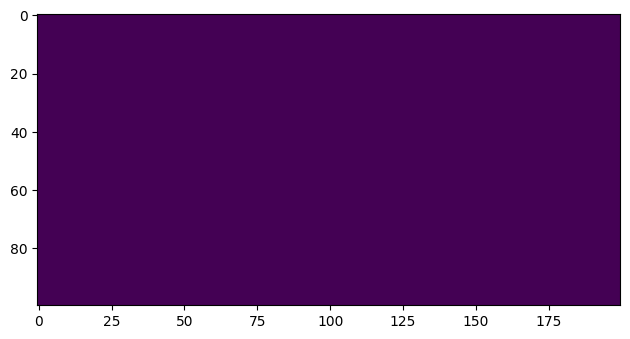

In [7]:
import matplotlib.pyplot as plt
import numpy as np

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])

plt.imshow(harvest)
plt.tight_layout()
plt.show()
